In [36]:
from pylab import *

import skimage
from skimage import color
from skimage import exposure
from skimage import filters
from skimage import io
from skimage import util

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np


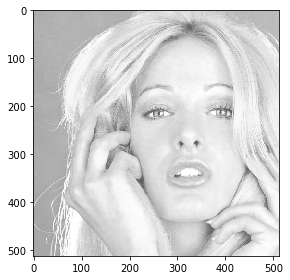

In [10]:
img = io.imread('tiffany_gray.tiff')
io.imshow(img, cmap='gray', vmin=0, vmax=255);

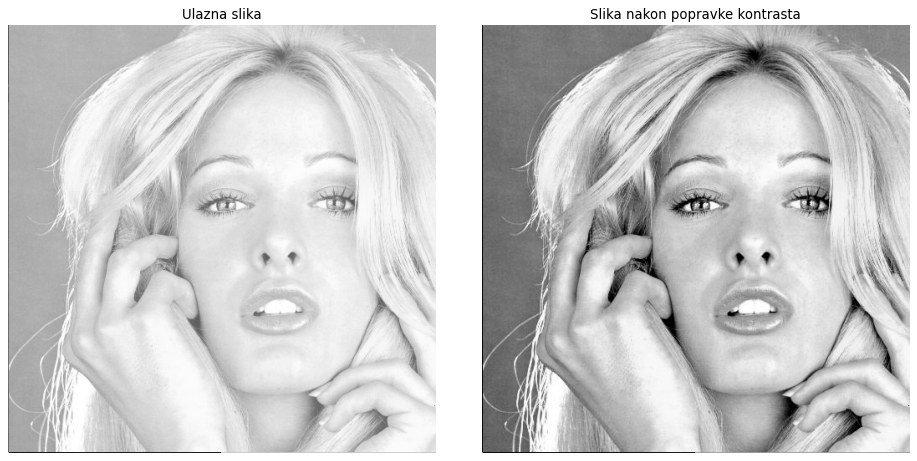

In [11]:
img_out = exposure.rescale_intensity(img, in_range = (110, 255), out_range = (0, 255))

fig, ax = plt.subplots(ncols=2, figsize=(12,6), dpi=80); plt.tight_layout();
ax[0].imshow(img, cmap='gray'); ax[0].set_title('Ulazna slika'); ax[0].axis('off')
ax[1].imshow(imgOut, cmap='gray'); ax[1].set_title('Slika nakon popravke kontrasta'); ax[1].axis('off');


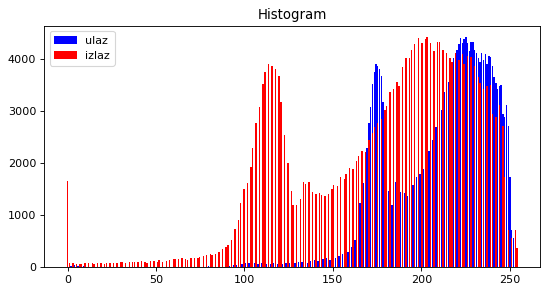

In [12]:
hist_img_in, bin_edges = np.histogram(img.flatten(), bins=256, range=(0,255))
hist_img_out, bin_edges = np.histogram(img_out.flatten(), bins=256, range=(0,255))

plt.figure(figsize=(8,4), dpi=80);
plt.bar(bin_edges[0:-1], hist_img_in, color='b', label = 'ulaz')
plt.bar(bin_edges[0:-1], hist_img_out, color='r', label = 'izlaz')
plt.legend(); plt.title('Histogram');

In [6]:
def hist_stretch(f, in_min=0, in_max=255):
    
    g = exposure.rescale_intensity(f, in_range=(in_min, in_max), out_range=(0,255))
    
    hist, bin_edges = np.histogram(g.flatten(), bins=256, range=(0,255))
    
    fig, ax = plt.subplots(ncols=2, figsize=(16,6), dpi=80)
    plt.tight_layout()
    
    ax[0].imshow(g, cmap='gray'); ax[0].set_title('Izlazna slika'); ax[0].axis('off')
    ax[1].bar(bin_edges[0:-1], hist); ax[1].set_title('Histogram izlazne slike'); plt.xlim([0,255])
    
    plt.show()
    
    return

In [7]:
interact(hist_stretch, f=fixed(img), in_min=(0,255), in_max=(0,255));

interactive(children=(IntSlider(value=0, description='in_min', max=255), IntSlider(value=255, description='in_…

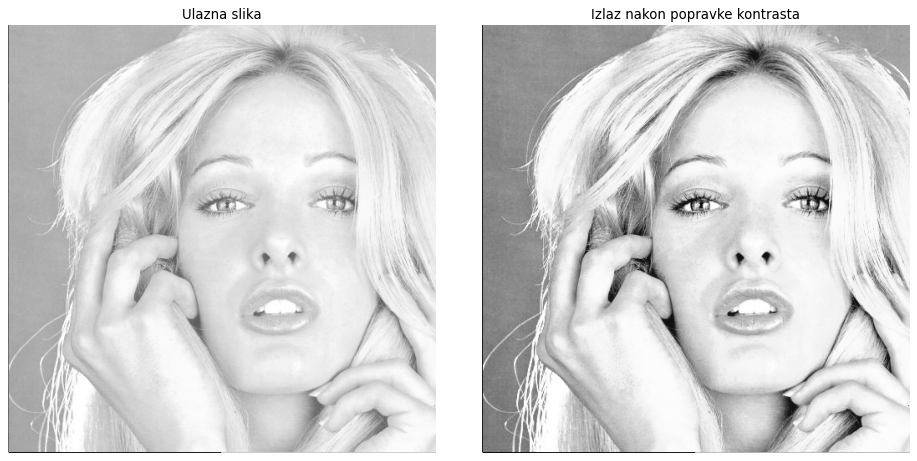

In [13]:
#Piecewise linear histogram stretching

a = 110; b = 230; val_a = 20; val_b = 240

x_val = [0, a, b, 255]
y_val = [0, val_a, val_b, 255]

img_out = uint8(interp(double(img), x_val, y_val))

fig, ax = plt.subplots(ncols=2, figsize=(12,6), dpi=80)
plt.tight_layout()

ax[0].imshow(img, cmap='gray', vmin = 0, vmax = 255); ax[0].set_title('Ulazna slika'); ax[0].axis('off')
ax[1].imshow(img_out, cmap='gray', vmin = 0, vmax = 255); ax[1].set_title('Izlaz nakon popravke kontrasta'); ax[1].axis('off');

low_in = 123
high_in = 251


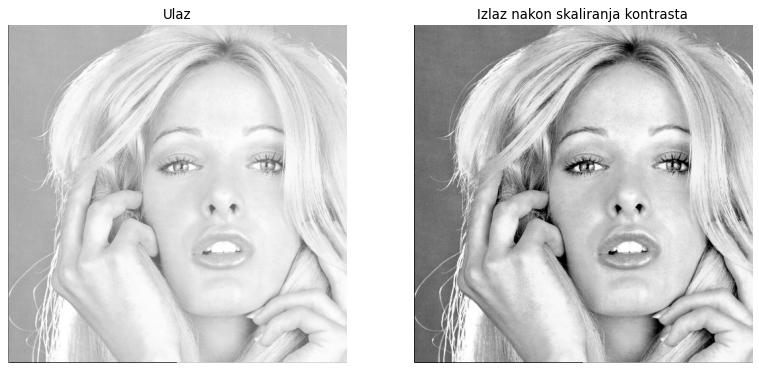

In [14]:
#low_in = min(img.flatten())
#high_in = max(img.flatten())

low_in = uint8(np.percentile(img.flatten(), 1))
high_in = uint8(np.percentile(img.flatten(), 99))

img_out = exposure.rescale_intensity(img, in_range=(low_in, high_in), out_range=(0,255))

fig, ax = plt.subplots(ncols=2, figsize=(12,6), dpi=80)

ax[0].imshow(img, cmap='gray', vmin=0, vmax=255); ax[0].set_title('Ulaz'); ax[0].axis('off')
ax[1].imshow(imgOut, cmap='gray', vmin=0, vmax=255); ax[1].set_title('Izlaz nakon skaliranja kontrasta'); ax[1].axis('off')

print('low_in = ' + str(low_in))
print('high_in = ' + str(high_in))

In [19]:
img = color.rgb2gray(imread('text.jpg'))

thr_otsu = filters.threshold_otsu(img)

def image_binarization(img, thr_otsu, thr_in=0.5):
    
    img_out_bw = img > thr_in
    
    fig, ax = plt.subplots(ncols=3, figsize=(24,8), dpi=80)
    
    ax[0].imshow(img, cmap='gray', vmin=0, vmax=1); ax[0].set_title('Ulaz'); ax[0].axis('off')
    ax[1].hist(img.flatten(), bins=256); ax[1].set_title('Histogram')
    ax[1].axvline(thr_in, color='b'); ax[1].axvline(thr_otsu, color='r')
    ax[2].imshow(img_out_bw, cmap='gray', vmin=0, vmax=1); ax[2].set_title('Binarizovana slika'); ax[2].axis('off')
    
    plt.figure(num='Izlazna slika', figsize=(40,10), dpi=80)
    plt.tight_layout()
    plt.imshow(img_out_bw, cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    
    return

In [20]:
interactive(image_binarization, img=fixed(img), thr_otsu=fixed(thr_otsu), thr_in=(0,1,0.02))

interactive(children=(FloatSlider(value=0.5, description='thr_in', max=1.0, step=0.02), Output()), _dom_classe…

In [23]:
def get_threshold(img):
    thr = 0.5
    thr_new = ((mean(img[img<=thr]) + mean(img[img>thr])))/2
    
    while (abs(thr_new-thr) > 0.001):
        thr = thr_new
        thr_new = ((mean(img[img<=thr]) + mean(img[img>thr])))/2
    
    return thr_new

In [24]:
thr = get_threshold(img)
thr_otsu = filters.threshold_otsu(img)

print('Određeni prag: ', str(thr))
print('Otsu prag: ', str(thr_otsu))

Određeni prag:  0.632079394466273
Otsu prag:  0.6307926631433824


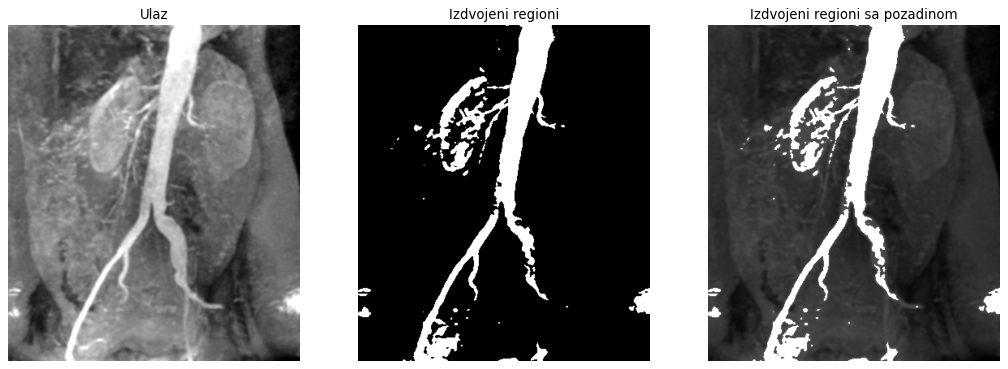

In [25]:
img = imread('kidney.tif')

img_out = zeros(shape(img))
mask = (img>=155) & (img<=235)

img_out[mask] = 255

img_out_background = zeros(shape(img))
img_out_background[mask] = 255
img_out_background[~mask] = 0.5*img[~mask]

fig, ax = plt.subplots(ncols=3, figsize=(16,6), dpi=80)

ax[0].imshow(img, cmap='gray'); ax[0].set_title('Ulaz'); ax[0].axis('off')
ax[1].imshow(img_out, cmap='gray'); ax[1].set_title('Izdvojeni regioni'); ax[1].axis('off')
ax[2].imshow(img_out_background, cmap='gray'); ax[2].set_title('Izdvojeni regioni sa pozadinom'); ax[2].axis('off');

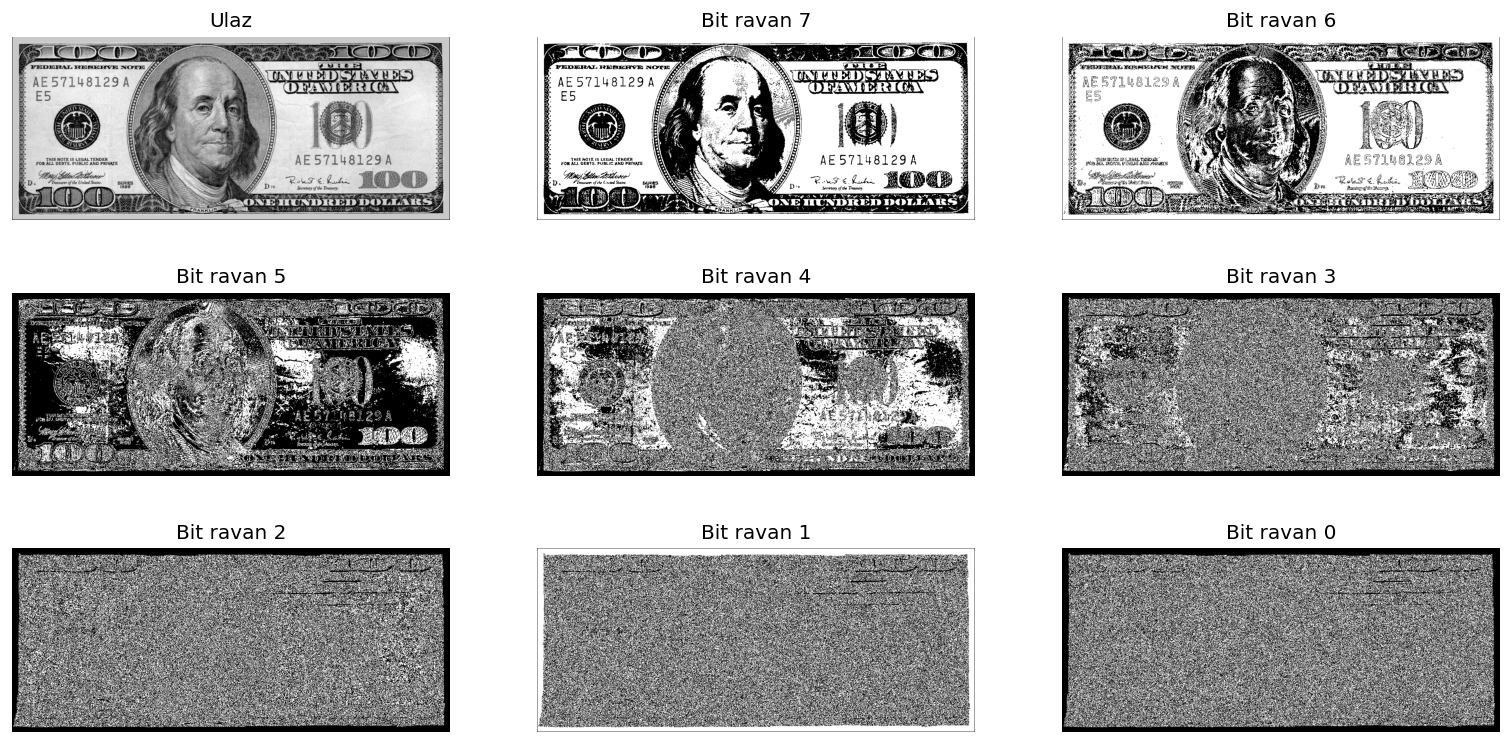

In [28]:
img = imread('dollar.tif')
bit_planes = zeros((8, shape(img)[0], shape(img)[1]), dtype='uint8')

for i in range(8):
    mask = 1 << i
    bit_planes[i] = 255*((img & mask)>>i)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,8), dpi=120)
ax = axes.ravel()

ax[0].imshow(img, cmap='gray'); ax[0].set_title('Ulaz'); ax[0].axis('off')

for i in range(7,-1,-1):
    ax[8-i].imshow(bit_planes[i], cmap='gray');
    ax[8-i].set_title('Bit ravan ' + str(i))
    ax[8-i].axis('off')
    

In [15]:
def plot_img_and_hist(image, axes, bins=256):
    """
    Kratak opis funkcije
    Iscrtavanje slike, histograma i kumulativnog histograma
    
    Ulazi
    
      image - 
      axes - 
    
    Izlazi
    
    
    Primer
    
    Reference
    
    
    """
    image = skimage.img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()
    
    # Iscrtavanje slike
    ax_img.imshow(image, cmap='gray', vmin=0, vmax=1); ax_img.set_axis_off()
    
    # Iscrtavanje histograma
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='b')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    ax_hist.set_xlabel('Intenzitet piksela')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])
    
    # Iscrtavanje kumulativnog histograma
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])
    
    return ax_img, ax_hist, ax_cdf

C:\Users\DRAGOM~1\AppData\Local\Temp/ipykernel_23608/2849915364.py:17: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 4), dtype=np.object)


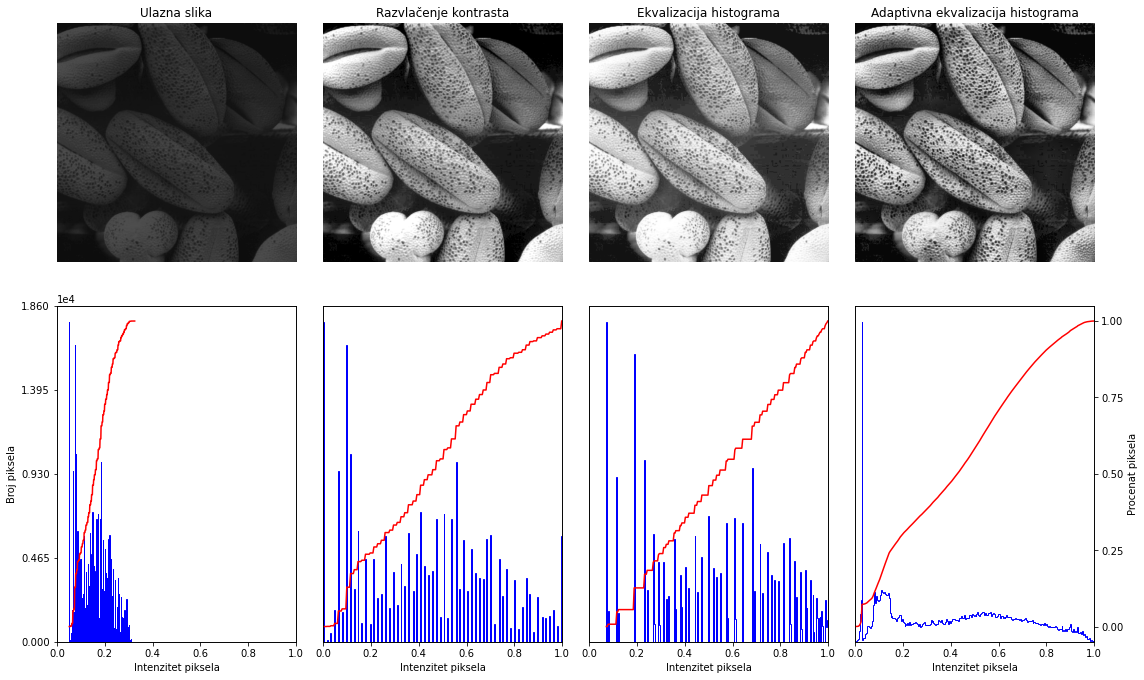

In [16]:
# Učitavanje ulazne slike
img = imread('dark.tif')

# Razvlačenje kontrasta
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Ekvalizacija histograma
img_eq = exposure.equalize_hist(img)

# Adaptivna ekvalizacija histograma sa ograničenjem kontrasta
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Prikaz rezultata
fig = plt.figure(figsize=(16, 10))

axes = np.zeros((2, 4), dtype=np.object)

#fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,10), dpi=120)
#axes = ax.ravel()

axes[0,0] = fig.add_subplot(2, 4, 1)
for i in range(1,4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0,4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:,0])
ax_img.set_title('Ulazna slika')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Broj piksela')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:,1])
ax_img.set_title('Razvlačenje kontrasta')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:,2])
ax_img.set_title('Ekvalizacija histograma')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:,3])
ax_img.set_title('Adaptivna ekvalizacija histograma')

ax_cdf.set_ylabel('Procenat piksela')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# sprečava preklapanje oznaka na y-osi
fig.tight_layout()
plt.show()

In [17]:
import imageio
#imageio.plugins.freeimage.download()

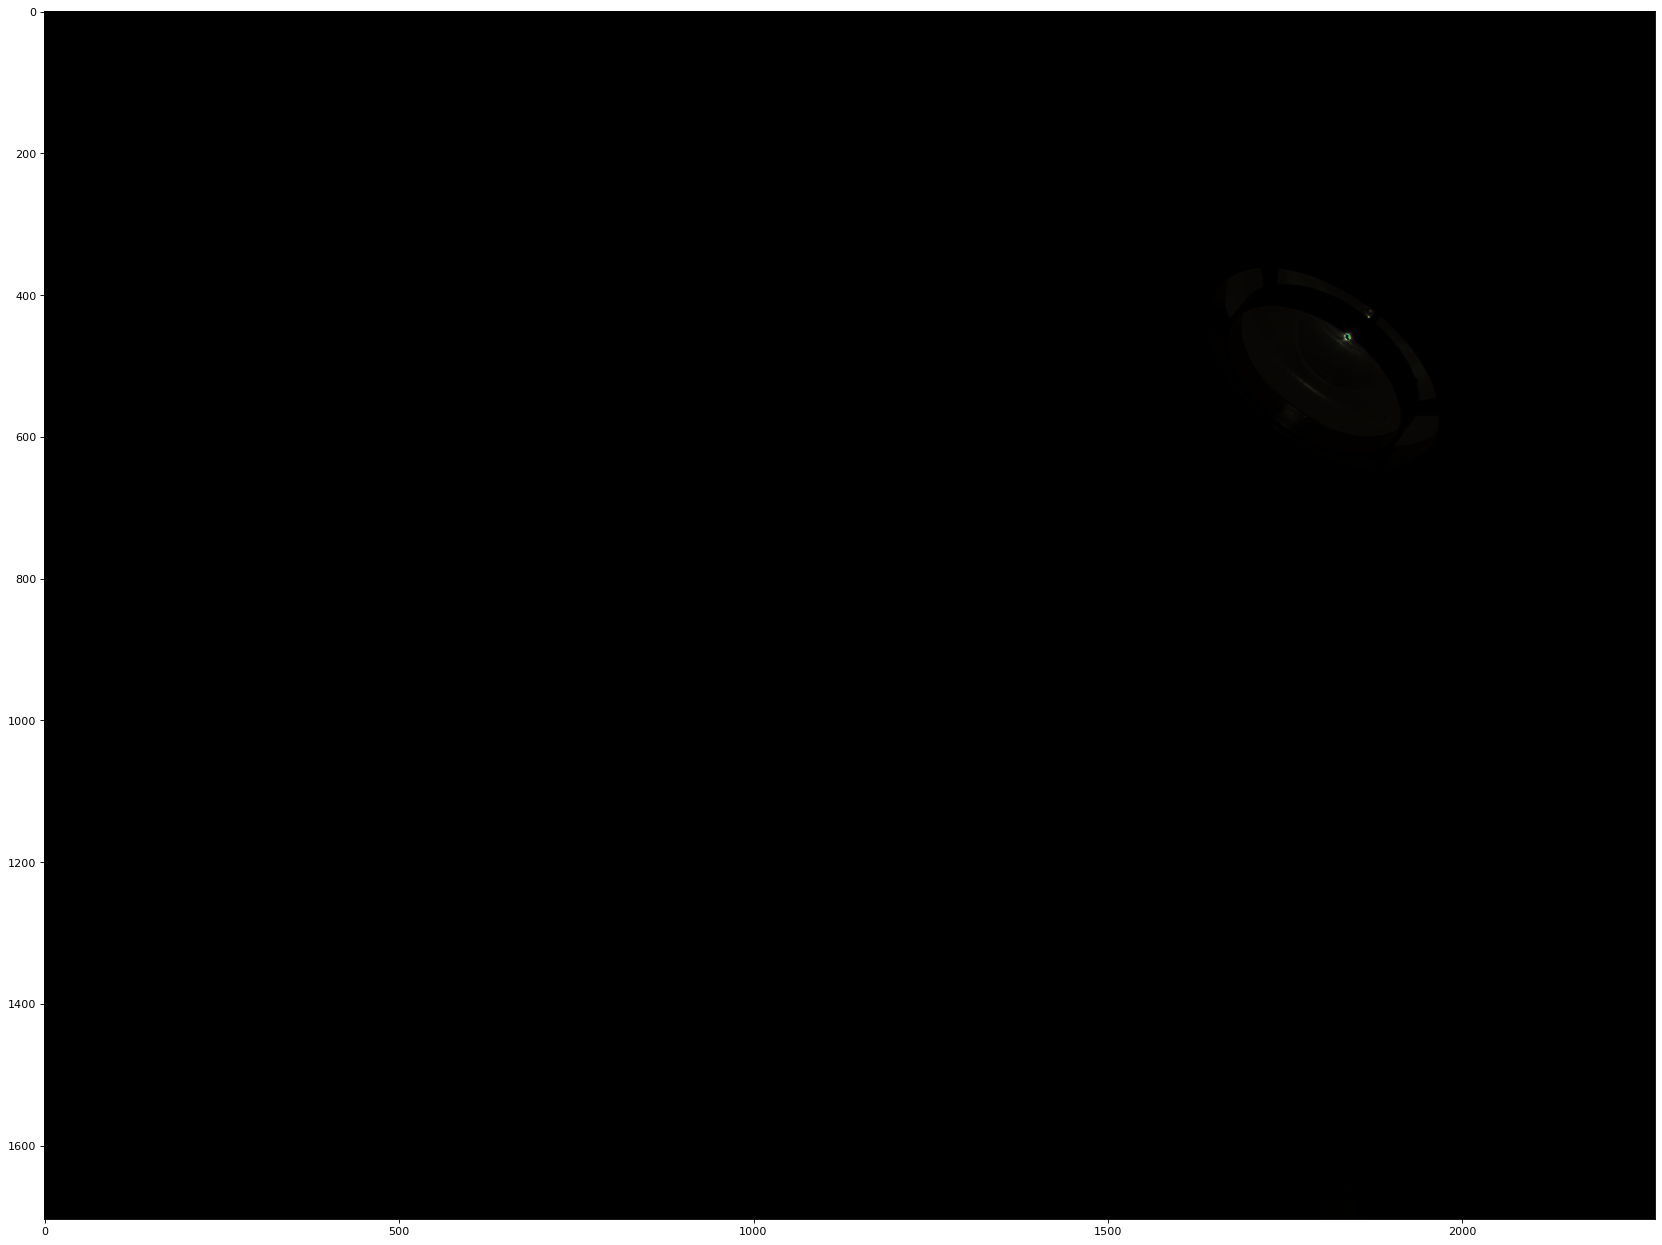

In [18]:
f = imageio.imread('cadik-desk02.hdr', format='HDR-FI')
f = f/max(f.flatten())
plt.figure(figsize=(32,20), dpi=80); plt.imshow(f);

In [19]:
def log_transform(f, axes, c):
    g = log(1 + (10**c)*f)/log(1+10**c)
    plt.figure(figsize=(32,20)); axis('off')
    imshow(g)
    
    
interact(log_transform, f=fixed(f), axes=fixed(axes), c=(0,10,0.2))

interactive(children=(FloatSlider(value=5.0, description='c', max=10.0, step=0.2), Output()), _dom_classes=('w…

<function __main__.log_transform(f, axes, c)>

In [20]:
def gamma_transform(f, axes, c=0.5):
    g = f**c
    plt.figure(figsize=(32,20)); axis('off')
    imshow(g)
    
    
interact(gamma_transform, f=fixed(f), axes=fixed(axes), c=(0,1,0.02))

interactive(children=(FloatSlider(value=0.5, description='c', max=1.0, step=0.02), Output()), _dom_classes=('w…

<function __main__.gamma_transform(f, axes, c=0.5)>

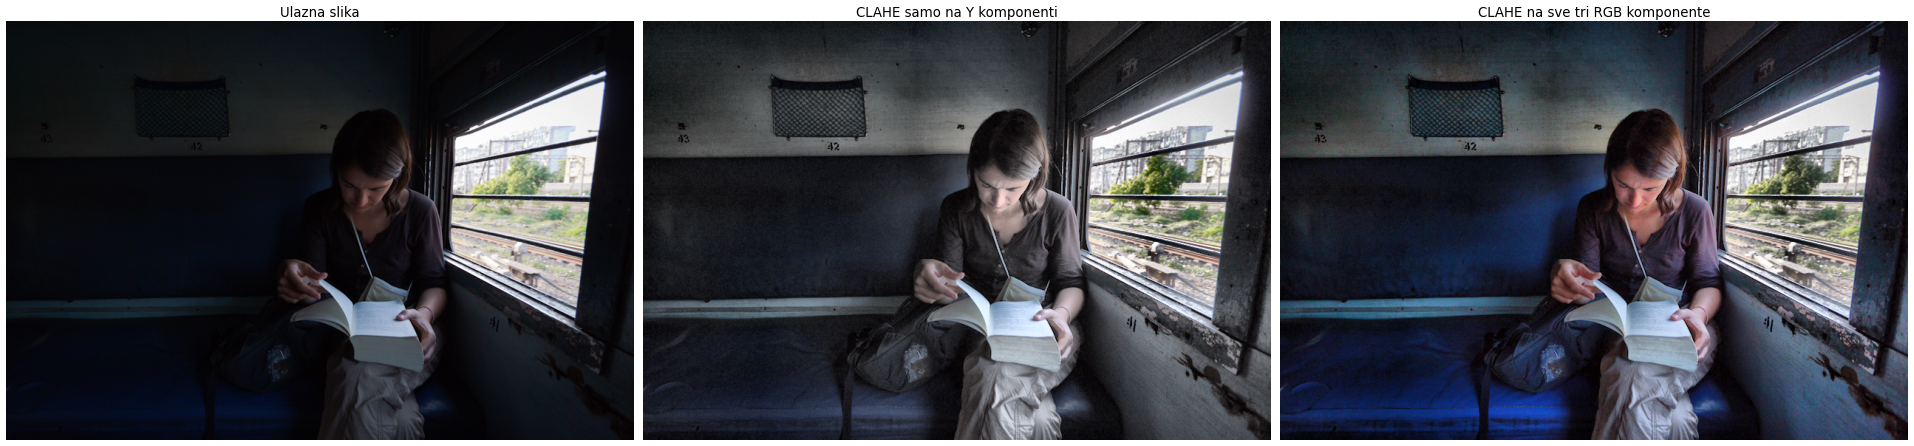

In [38]:
img = util.img_as_float(io.imread('train.jpg'))

[height, width, planes] = shape(img)

img_yuv = color.rgb2yuv(img)
y_in = img_yuv[:,:,0]

y_out = exposure.equalize_adapthist(y_in, [height/8, width/8], clip_limit=0.02, nbins=256)

img_yuv_out = np.zeros(shape(img))
img_yuv_out[:,:,1:3] = img_yuv[:,:,1:3]
img_yuv_out[:,:,0] = y_out;

img_out = color.yuv2rgb(img_yuv_out)
img_out = np.clip(img_out, 0, 1)

img_out_rgb_eq = exposure.equalize_adapthist(img, [height/8, width/8], clip_limit=0.02, nbins=256)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(32,8), dpi=60)
ax = axes.ravel()

ax[0].imshow(img); ax[0].set_axis_off(); ax[0].set_title('Ulazna slika', fontsize=16)
ax[1].imshow(img_out); ax[1].set_axis_off(); ax[1].set_title('CLAHE samo na Y komponenti', fontsize=16)
ax[2].imshow(img_out_rgb_eq); ax[2].set_axis_off(); ax[2].set_title('CLAHE na sve tri RGB komponente', fontsize=16)

plt.tight_layout()